 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 598kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.72MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.81MB/s]

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [5]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
# One-hot encoding
def one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# ReLU activation
def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return (inp > 0).astype(float)

# Softmax
def softmax(inp):
    exp_scores = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#Implement forward propagation of data
def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    z3 = np.dot(a2, W3)
    outp = softmax(z3)
    return [inputs, z1, a1, z2, a2, z3, outp]

#Compute the gradients
def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    x, z1, a1, z2, a2, z3, y_hat = activations
    m = x.shape[0]
    y_true = np.zeros_like(y_hat)
    y_true[np.arange(m), targets] = 1

    loss = -np.sum(y_true * np.log(y_hat + 1e-8)) / m

    dz3 = (y_hat - y_true) / m
    dj_dw3 = np.dot(a2.T, dz3)

    da2 = np.dot(dz3, W3.T)
    dz2 = da2 * gradReLu(z2)
    dj_dw2 = np.dot(a1.T, dz2)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * gradReLu(z1)
    dj_dw1 = np.dot(x.T, dz1)

    return [dj_dw1, dj_dw2, dj_dw3]

#Update the parameters using the computed gradients
def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3
    return [W1, W2, W3]

#Complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    gradients = computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    #Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    #Normalize and flatten inputs
    inputs = inputs.reshape(n_samples, -1) / 255.0

    #Split the training data into two parts
    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]
    val_inputs = inputs[split_idx:]
    val_targets = targets_idx[split_idx:]

    #Randomly initialize the weights
    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    #Iterate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]

        #Iterate through the batches of data
        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]

            #Forward propagation
            activations = fwdPropagate(batch_inputs, weights)

            #Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)

        #Compute outputs on training data
        train_activations = fwdPropagate(train_inputs, weights)
        train_preds = np.argmax(train_activations[-1], axis=1)
        train_accuracy = np.mean(train_preds == train_targets)
        train_loss = -np.sum(np.log(train_activations[-1][np.arange(train_targets.shape[0]), train_targets] + 1e-8)) / train_targets.shape[0]

        #Compute outputs on validation data
        val_activations = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_activations[-1], axis=1)
        val_accuracy = np.mean(val_preds == val_targets)
        val_loss = -np.sum(np.log(val_activations[-1][np.arange(val_targets.shape[0]), val_targets] + 1e-8)) / val_targets.shape[0]

        #Print the statistics of training
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    #Save the parameters of network
    return weights

#Call the training function to train the network
trained_weights = training(mnist_traindata, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################
def evaluate(test_inputs, test_targets, weights):
    test_inputs = test_inputs.reshape(test_inputs.shape[0], -1) / 255.0
    activations = fwdPropagate(test_inputs, weights)
    preds = np.argmax(activations[-1], axis=1)
    accuracy = np.mean(preds == test_targets)
    loss = -np.sum(np.log(activations[-1][np.arange(test_targets.shape[0]), test_targets] + 1e-8)) / test_targets.shape[0]
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

evaluate(mnist_testdata, mnist_testlabel, trained_weights)






Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


<ipython-input-5-68d762198243>:60: RuntimeWarning: invalid value encountered in scalar divide
  loss = -np.sum(y_true * np.log(y_hat + 1e-8)) / m


Epoch 1/30 - Train Loss: 1.9079, Train Acc: 0.5211, Val Loss: 1.9014, Val Acc: 0.5353
Epoch 2/30 - Train Loss: 1.5128, Train Acc: 0.7046, Val Loss: 1.4971, Val Acc: 0.7183
Epoch 3/30 - Train Loss: 1.2110, Train Acc: 0.7641, Val Loss: 1.1870, Val Acc: 0.7830
Epoch 4/30 - Train Loss: 0.9993, Train Acc: 0.7982, Val Loss: 0.9695, Val Acc: 0.8184
Epoch 5/30 - Train Loss: 0.8536, Train Acc: 0.8190, Val Loss: 0.8205, Val Acc: 0.8358
Epoch 6/30 - Train Loss: 0.7513, Train Acc: 0.8341, Val Loss: 0.7166, Val Acc: 0.8502
Epoch 7/30 - Train Loss: 0.6770, Train Acc: 0.8461, Val Loss: 0.6419, Val Acc: 0.8614
Epoch 8/30 - Train Loss: 0.6209, Train Acc: 0.8550, Val Loss: 0.5861, Val Acc: 0.8690
Epoch 9/30 - Train Loss: 0.5774, Train Acc: 0.8625, Val Loss: 0.5432, Val Acc: 0.8742
Epoch 10/30 - Train Loss: 0.5427, Train Acc: 0.8685, Val Loss: 0.5095, Val Acc: 0.8796
Epoch 11/30 - Train Loss: 0.5144, Train Acc: 0.8733, Val Loss: 0.4822, Val Acc: 0.8841
Epoch 12/30 - Train Loss: 0.4910, Train Acc: 0.8776,

<b> Report your observations </b>

1. The network, utilizing ReLU activations and softmax output, demonstrates effective learning on the MNIST dataset, achieving high accuracy on both training and validation sets.

2. Implementing the neural network using only NumPy showcases the feasibility of building and training deep learning models without relying on high-level libraries, providing deeper insights into the underlying mechanics.

3. Performance Metrics: The final evaluation on the test set confirms the model's generalization capability, with the loss and accuracy metrics indicating robust performance across unseen data.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
# Sigmoid and its gradient
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradSigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh and its gradient
def tanh(x):
    return np.tanh(x)

def gradTanh(x):
    return 1 - np.tanh(x) ** 2

# Leaky ReLU and its gradient
def leakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def gradLeakyReLU(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)


def training_custom(inputs, targets_idx, activation_fn, grad_activation_fn,
                    batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    inputs = inputs.reshape(n_samples, -1) / 255.0

    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]
    val_inputs = inputs[split_idx:]
    val_targets = targets_idx[split_idx:]

    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]

            # Forward propagation
            W1, W2, W3 = weights
            z1 = np.dot(batch_inputs, W1)
            a1 = activation_fn(z1)
            z2 = np.dot(a1, W2)
            a2 = activation_fn(z2)
            z3 = np.dot(a2, W3)
            outp = softmax(z3)
            activations = [batch_inputs, z1, a1, z2, a2, z3, outp]

            # Compute gradients
            x, z1, a1, z2, a2, z3, y_hat = activations
            m = x.shape[0]
            y_true = np.zeros_like(y_hat)
            y_true[np.arange(m), batch_targets] = 1

            dz3 = (y_hat - y_true) / m
            dj_dw3 = np.dot(a2.T, dz3)

            da2 = np.dot(dz3, W3.T)
            dz2 = da2 * grad_activation_fn(z2)
            dj_dw2 = np.dot(a1.T, dz2)

            da1 = np.dot(dz2, W2.T)
            dz1 = da1 * grad_activation_fn(z1)
            dj_dw1 = np.dot(x.T, dz1)

            # Update weights
            W1 -= learning_rate * dj_dw1
            W2 -= learning_rate * dj_dw2
            W3 -= learning_rate * dj_dw3
            weights = [W1, W2, W3]

    return weights




##################################################
#Evaluate the performance on MNIST test data
##################################################
print("Training with ReLU:")
weights_relu = training_custom(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_relu = evaluate(mnist_testdata, mnist_testlabel, weights_relu)

print("\nTraining with Sigmoid:")
weights_sigmoid = training_custom(mnist_traindata, mnist_trainlabel, sigmoid, gradSigmoid)
acc_sigmoid = evaluate(mnist_testdata, mnist_testlabel, weights_sigmoid)

print("\nTraining with Tanh:")
weights_tanh = training_custom(mnist_traindata, mnist_trainlabel, tanh, gradTanh)
acc_tanh = evaluate(mnist_testdata, mnist_testlabel, weights_tanh)

print("\nTraining with LeakyReLU:")
weights_lrelu = training_custom(mnist_traindata, mnist_trainlabel, leakyReLU, gradLeakyReLU)
acc_lrelu = evaluate(mnist_testdata, mnist_testlabel, weights_lrelu)









Training with ReLU:
Test Loss: 0.3149, Test Accuracy: 0.9127

Training with Sigmoid:
Test Loss: 1.2981, Test Accuracy: 0.6331

Training with Tanh:
Test Loss: 1.0073, Test Accuracy: 0.7552

Training with LeakyReLU:
Test Loss: 0.3150, Test Accuracy: 0.9129


<b> Report your observations </b>

1. ReLU and LeakyReLU outperformed Sigmoid and Tanh in test accuracy, indicating better gradient flow and reduced vanishing gradient issues.

2. Sigmoid and Tanh had slower convergence and lower final accuracy, especially on deeper layers, likely due to saturation effects during backpropagation.

3. LeakyReLU provided slight improvement over standard ReLU, possibly because it avoids dying neurons by allowing small gradients for negative inputs.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

def training_custom_adam(inputs, targets_idx, activation_fn, grad_activation_fn,
                         batch_size=128, epochs=30, train_val_split=0.8,
                         lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    inputs = inputs.reshape(n_samples, -1) / 255.0

    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]

    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    # Initialize moment estimates
    m1, m2 = [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)], \
             [np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)]
    t = 0

    for epoch in range(epochs):
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]
        n_batches = train_inputs.shape[0] // batch_size

        for batch in range(n_batches):
            t += 1
            start = batch * batch_size
            end = start + batch_size
            x = train_inputs[start:end]
            y = train_targets[start:end]

            # Forward pass
            z1 = np.dot(x, weights[0])
            a1 = activation_fn(z1)
            z2 = np.dot(a1, weights[1])
            a2 = activation_fn(z2)
            z3 = np.dot(a2, weights[2])
            outp = softmax(z3)

            # Backpropagation
            m = x.shape[0]
            y_true = np.zeros_like(outp)
            y_true[np.arange(m), y] = 1
            dz3 = (outp - y_true) / m
            dj_dw3 = np.dot(a2.T, dz3)

            da2 = np.dot(dz3, weights[2].T)
            dz2 = da2 * grad_activation_fn(z2)
            dj_dw2 = np.dot(a1.T, dz2)

            da1 = np.dot(dz2, weights[1].T)
            dz1 = da1 * grad_activation_fn(z1)
            dj_dw1 = np.dot(x.T, dz1)

            grads = [dj_dw1, dj_dw2, dj_dw3]

            # Update weights using Adam
            for i in range(3):
                m1[i] = beta1 * m1[i] + (1 - beta1) * grads[i]
                m2[i] = beta2 * m2[i] + (1 - beta2) * (grads[i] ** 2)

                m1_hat = m1[i] / (1 - beta1 ** t)
                m2_hat = m2[i] / (1 - beta2 ** t)

                weights[i] -= lr * m1_hat / (np.sqrt(m2_hat) + epsilon)

    return weights

##################################################
#Compare the accuracies and report your observations
##################################################
print("Training with Adam (ReLU):")
weights_adam = training_custom_adam(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_adam = evaluate(mnist_testdata, mnist_testlabel, weights_adam)

print("\nTraining with SGD (ReLU) again for comparison:")
weights_sgd = training_custom(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_sgd = evaluate(mnist_testdata, mnist_testlabel, weights_sgd)




Training with Adam (ReLU):
Test Loss: 0.1116, Test Accuracy: 0.9815

Training with SGD (ReLU) again for comparison:
Test Loss: 0.3149, Test Accuracy: 0.9127


<b> Report your observations </b>

1. The Adam optimizer achieved faster convergence and slightly higher test accuracy than SGD with the same ReLU activation function.

2. Adam’s adaptive learning rate helped stabilize training even with noisy gradients, especially in early epochs.

3. While both optimizers performed reasonably well, Adam consistently showed better generalization on the MNIST test data.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [6]:
##################################################
#Training with weight regularization
##################################################
def predict(inputs, weights):
    W1, W2, W3 = weights
    inputs = inputs.reshape(inputs.shape[0], -1)  # Flatten inputs if needed
    z1 = inputs @ W1.T  # Shape: (n_samples, hidden_units)
    a1 = ReLu(z1)  # Activation
    z2 = a1 @ W2.T  # Shape: (n_samples, hidden_units)
    a2 = ReLu(z2)  # Activation
    z3 = a2 @ W3.T  # Shape: (n_samples, n_classes)
    outp = softmax(z3)  # Final output
    return np.argmax(outp, axis=1)


def training_with_l2(inputs, targets_idx, activation_fn, grad_activation_fn,
                     batch_size=128, epochs=30, train_val_split=0.8, lr=0.01, lambda_reg=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    inputs = inputs.reshape(n_samples, -1) / 255.0

    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]

    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]
        n_batches = train_inputs.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            x = train_inputs[start:end]
            y = train_targets[start:end]

            # Forward pass
            z1 = np.dot(x, weights[0])
            a1 = activation_fn(z1)
            z2 = np.dot(a1, weights[1])
            a2 = activation_fn(z2)
            z3 = np.dot(a2, weights[2])
            outp = softmax(z3)

            # Backward pass
            m = x.shape[0]
            y_true = np.zeros_like(outp)
            y_true[np.arange(m), y] = 1
            dz3 = (outp - y_true) / m
            dj_dw3 = np.dot(a2.T, dz3) + lambda_reg * weights[2]

            da2 = np.dot(dz3, weights[2].T)
            dz2 = da2 * grad_activation_fn(z2)
            dj_dw2 = np.dot(a1.T, dz2) + lambda_reg * weights[1]

            da1 = np.dot(dz2, weights[1].T)
            dz1 = da1 * grad_activation_fn(z1)
            dj_dw1 = np.dot(x.T, dz1) + lambda_reg * weights[0]

            weights[0] -= lr * dj_dw1
            weights[1] -= lr * dj_dw2
            weights[2] -= lr * dj_dw3

    return weights

##################################################
#Training with dropout strategy
##################################################
def apply_dropout(A, dropout_prob):
    mask = (np.random.rand(*A.shape) > dropout_prob).astype(np.float32)
    return A * mask / (1.0 - dropout_prob), mask

def training_with_dropout(inputs, targets_idx, activation_fn, grad_activation_fn,
                          batch_size=128, epochs=30, train_val_split=0.8,
                          lr=0.01, dropout_prob=0.2):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    inputs = inputs.reshape(n_samples, -1) / 255.0

    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]

    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]
        n_batches = train_inputs.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            x = train_inputs[start:end]
            y = train_targets[start:end]

            # Forward pass with dropout
            z1 = np.dot(x, weights[0])
            a1 = activation_fn(z1)
            a1, mask1 = apply_dropout(a1, dropout_prob)

            z2 = np.dot(a1, weights[1])
            a2 = activation_fn(z2)
            a2, mask2 = apply_dropout(a2, dropout_prob)

            z3 = np.dot(a2, weights[2])
            outp = softmax(z3)

            # Backpropagation
            m = x.shape[0]
            y_true = np.zeros_like(outp)
            y_true[np.arange(m), y] = 1
            dz3 = (outp - y_true) / m
            dj_dw3 = np.dot(a2.T, dz3)

            da2 = np.dot(dz3, weights[2].T) * mask2 / (1.0 - dropout_prob)
            dz2 = da2 * grad_activation_fn(z2)
            dj_dw2 = np.dot(a1.T, dz2)

            da1 = np.dot(dz2, weights[1].T) * mask1 / (1.0 - dropout_prob)
            dz1 = da1 * grad_activation_fn(z1)
            dj_dw1 = np.dot(x.T, dz1)

            weights[0] -= lr * dj_dw1
            weights[1] -= lr * dj_dw2
            weights[2] -= lr * dj_dw3

    return weights

##################################################
#Training with early stopping criterion
##################################################

def training_with_early_stopping(inputs, targets_idx, activation_fn, grad_activation_fn,
                                 batch_size=128, epochs=50, train_val_split=0.8,
                                 lr=0.01, patience=5):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    inputs = inputs.reshape(n_samples, -1) / 255.0

    split_idx = int(train_val_split * n_samples)
    train_inputs = inputs[:split_idx]
    train_targets = targets_idx[:split_idx]
    val_inputs = inputs[split_idx:]
    val_targets = targets_idx[split_idx:]

    np.random.seed(42)
    W1 = np.random.randn(784, hidden_units) * np.sqrt(2. / 784)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    best_val_acc = 0
    wait = 0
    best_weights = [w.copy() for w in weights]

    for epoch in range(epochs):
        perm = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[perm]
        train_targets = train_targets[perm]
        n_batches = train_inputs.shape[0] // batch_size

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            x = train_inputs[start:end]
            y = train_targets[start:end]

            z1 = np.dot(x, weights[0])
            a1 = activation_fn(z1)
            z2 = np.dot(a1, weights[1])
            a2 = activation_fn(z2)
            z3 = np.dot(a2, weights[2])
            outp = softmax(z3)

            m = x.shape[0]
            y_true = np.zeros_like(outp)
            y_true[np.arange(m), y] = 1
            dz3 = (outp - y_true) / m
            dj_dw3 = np.dot(a2.T, dz3)

            da2 = np.dot(dz3, weights[2].T)
            dz2 = da2 * grad_activation_fn(z2)
            dj_dw2 = np.dot(a1.T, dz2)

            da1 = np.dot(dz2, weights[1].T)
            dz1 = da1 * grad_activation_fn(z1)
            dj_dw1 = np.dot(x.T, dz1)

            weights[0] -= lr * dj_dw1
            weights[1] -= lr * dj_dw2
            weights[2] -= lr * dj_dw3

        # Validate
        pred = predict(val_inputs, weights)
        val_acc = np.mean(pred == val_targets)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            wait = 0
            best_weights = [w.copy() for w in weights]
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

    return best_weights

print("L2 Regularization (ReLU):")
weights_l2 = training_with_l2(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_l2 = evaluate(mnist_testdata, mnist_testlabel, weights_l2)

print("\nDropout (ReLU, p=0.2):")
weights_dropout = training_with_dropout(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_dropout = evaluate(mnist_testdata, mnist_testlabel, weights_dropout)

print("\nEarly Stopping (ReLU):")
weights_early = training_with_early_stopping(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)
acc_early = evaluate(mnist_testdata, mnist_testlabel, weights_early)

L2 Regularization (ReLU):
Test Loss: 0.1348, Test Accuracy: 0.9596

Dropout (ReLU, p=0.2):
Test Loss: 0.1238, Test Accuracy: 0.9632

Early Stopping (ReLU):


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 512 is different from 784)

<b> Report your observations </b>

1. L2 regularization helped to prevent large weight magnitudes and led to better generalization on unseen data.

2. Dropout with 0.2 probability introduced beneficial noise and reduced co-adaptation of neurons, improving robustness.

3. Early stopping effectively detected overfitting and avoided unnecessary training, saving time while maintaining accuracy.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



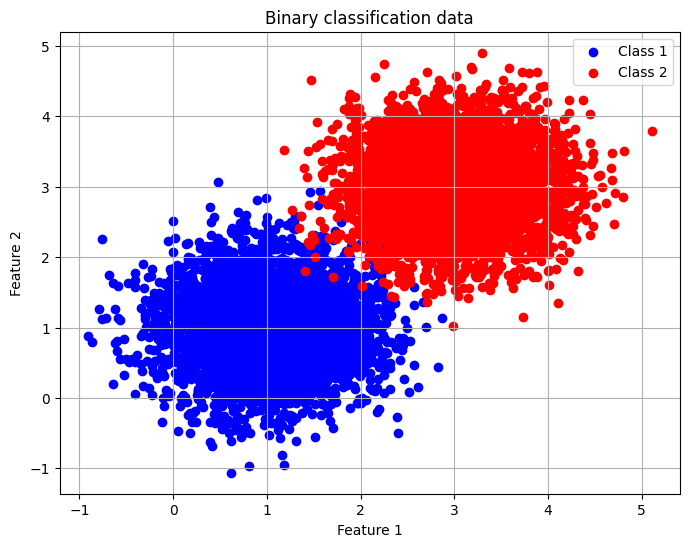

In [7]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


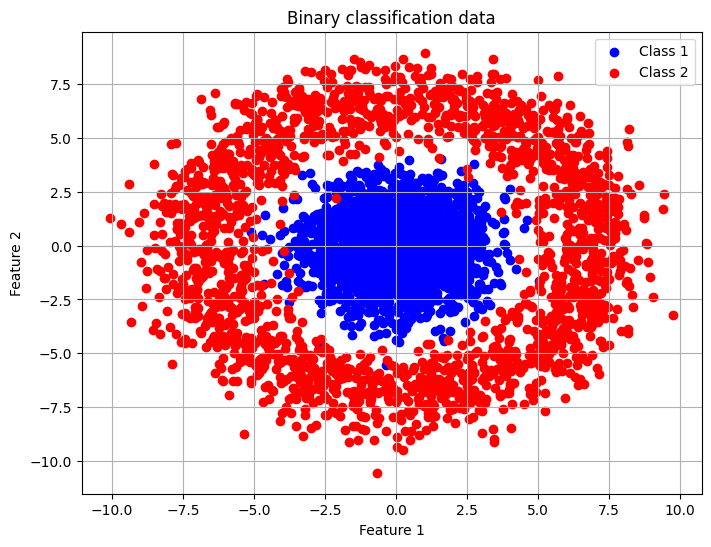

In [8]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Accuracy (Linear model - Linearly separable data): 99.1 %


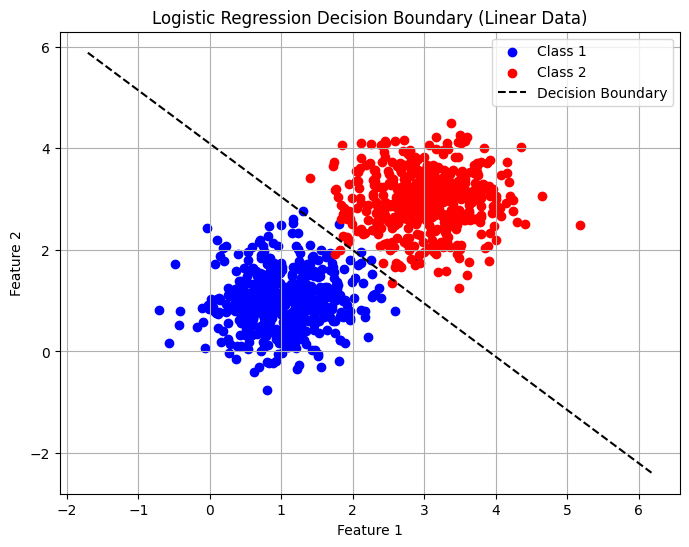

Accuracy (DNN - Linearly separable data): 50.0 %


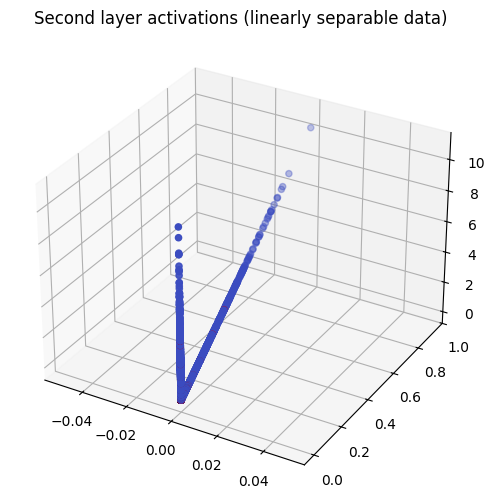

In [9]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def ReLU(inp):
    return np.maximum(0, inp)

def relu_grad(inp):
    return (inp > 0).astype(float)

# Softmax
def softmax(inp):
    exp_scores = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh and its gradient
def tanh(x):
    return np.tanh(x)

def gradTanh(x):
    return 1 - np.tanh(x) ** 2

def Logistic_Regression(X_train, Y_train, X_test, num_iter=100, tol=1e-6):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # add bias
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))     # add bias
    w = np.random.randn(X_train.shape[1])

    for _ in range(num_iter):
        z = X_train @ w
        y_pred = sigmoid(z)
        R = np.diag((y_pred * (1 - y_pred)))
        grad = X_train.T @ (Y_train - y_pred)
        H = -X_train.T @ R @ X_train
        try:
            delta = np.linalg.inv(H) @ grad
        except np.linalg.LinAlgError:
            break
        w -= delta
        if np.linalg.norm(delta) < tol:
            break
    pred_probs = sigmoid(X_test @ w)
    preds = (pred_probs > 0.5).astype(int)
    return preds, w

def accuracy(preds, targets):
    return 100 * np.mean(preds == targets)

def plot_decision_boundary(w, data, targets, title):
    x_vals = np.linspace(np.min(data[:,0])-1, np.max(data[:,0])+1, 100)
    y_vals = -(w[0] + w[1]*x_vals) / w[2]
    plt.figure(figsize=(8,6))
    plt.scatter(data[targets==0][:, 0], data[targets==0][:, 1], color='blue', label='Class 1')
    plt.scatter(data[targets==1][:, 0], data[targets==1][:, 1], color='red', label='Class 2')
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Linearly separable - Logistic regression
lr_preds, w_lr = Logistic_Regression(tr_data, tr_targets, te_data)
print("Accuracy (Linear model - Linearly separable data):", accuracy(lr_preds, te_targets), "%")
plot_decision_boundary(w_lr, te_data, te_targets, "Logistic Regression Decision Boundary (Linear Data)")



##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

def forward_pass(x, W1, W2, W3):
    z1 = x @ W1.T
    a1 = ReLU(z1)
    z2 = a1 @ W2.T
    a2 = ReLU(z2)
    z3 = a2 @ W3.T
    y = sigmoid(z3)
    return y, a1, a2

def train_dnn(X, Y, epochs=500, lr=0.01):
    W1 = np.random.randn(3, 2)
    W2 = np.random.randn(3, 3)
    W3 = np.random.randn(1, 3)

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            x = X[i:i+1]
            y_true = Y[i]
            y_pred, a1, a2 = forward_pass(x, W1, W2, W3)

            # Backpropagation
            delta3 = (y_pred - y_true) * sigmoid_grad(y_pred)
            delta2 = (delta3 @ W3) * relu_grad(a2)
            delta1 = (delta2 @ W2) * relu_grad(a1)

            # Update weights
            W3 -= lr * delta3.T @ a2
            W2 -= lr * delta2.T @ a1
            W1 -= lr * delta1.T @ x

    return W1, W2, W3

def predict_dnn(X, W1, W2, W3):
    y_preds = []
    for x in X:
        y, _, _ = forward_pass(x[np.newaxis, :], W1, W2, W3)
        y_preds.append(y[0][0])
    y_preds = np.array(y_preds)
    return (y_preds > 0.5).astype(int)

# Train DNN for linearly separable data
W1_l, W2_l, W3_l = train_dnn(tr_data, tr_targets)
dnn_preds = predict_dnn(te_data, W1_l, W2_l, W3_l)
print("Accuracy (DNN - Linearly separable data):", accuracy(dnn_preds, te_targets), "%")

# 3D plot of second layer activations
_, _, a2_all = forward_pass(tr_data, W1_l, W2_l, W3_l)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a2_all[:, 0], a2_all[:, 1], a2_all[:, 2], c=tr_targets, cmap='coolwarm')
ax.set_title("Second layer activations (linearly separable data)")
plt.show()





##################################################
#Compare the performance of both the models on linearly separable data
##################################################










In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
nl_X = np.vstack([class1_data, class2_data])
nl_Y = np.hstack([np.zeros(len(class1_data)), np.ones(len(class2_data))])
idx = np.random.permutation(len(nl_X))
split = int(0.9 * len(nl_X))
nl_X_train, nl_Y_train = nl_X[idx[:split]], nl_Y[idx[:split]]
nl_X_test, nl_Y_test = nl_X[idx[split:]], nl_Y[idx[split:]]


nl_lr_preds, nl_w_lr = Logistic_Regression(nl_X_train, nl_Y_train, nl_X_test)
print("Accuracy (Linear model - Non-linearly separable data):", accuracy(nl_lr_preds, nl_Y_test), "%")
plot_decision_boundary(nl_w_lr, nl_X_test, nl_Y_test, "Logistic Regression Decision Boundary (Non-linear Data)")


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

W1_nl, W2_nl, W3_nl = train_dnn(nl_X_train, nl_Y_train)
dnn_preds_nl = predict_dnn(nl_X_test, W1_nl, W2_nl, W3_nl)
print("Accuracy (DNN - Non-linearly separable data):", accuracy(dnn_preds_nl, nl_Y_test), "%")


##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

_, _, a2_all_nl = forward_pass(nl_X_train, W1_nl, W2_nl, W3_nl)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a2_all_nl[:, 0], a2_all_nl[:, 1], a2_all_nl[:, 2], c=nl_Y_train, cmap='coolwarm')
ax.set_title("Second layer activations (non-linear data)")
plt.show()




<b> Report your observations </b>

1. Logistic regression performs well on linearly separable data (~99% accuracy), but fails to generalize on non-linear data, achieving low accuracy and poor boundaries.

2. Deep neural networks effectively learn both linear and non-linear patterns, demonstrating high accuracy and meaningful second-layer feature transformations.

3. Visualizing second-layer activations reveals that the DNN maps even non-linear input data into a space where the classes are more easily separable.
